作业一: 验证高斯平滑的效果

In [2]:
image_name = './image/cat'

In [4]:
#### 前置工作
import cv2 as cv
import numpy as np
# 给图片加白噪声

image = cv.imread(f"{image_name}.jpg", cv.IMREAD_UNCHANGED)

height, width, channel = image.shape

for i in range(2000):
    x = np.random.randint(0, height)
    y = np.random.randint(0, width)
    image[x, y, :] = 255

cv.imwrite(f"{image_name}_white_noise.jpg", image)

rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

org_image = cv.imread(f"{image_name}.jpg", cv.IMREAD_UNCHANGED)
org_rgb_image = cv.cvtColor(org_image, cv.COLOR_BGR2RGB)

org_gray_image = cv.cvtColor(org_image, cv.COLOR_BGR2GRAY)

print(org_rgb_image)
print(org_gray_image)

(460, 690, 3)
(460, 690)


In [19]:
import matplotlib.pyplot as plt	

def show_image(image):
    plt.imshow(image)

def save_iamge(image, name='temp.jpg', cvt=True):
    cv.imwrite(name, cv.cvtColor(image, cv.COLOR_BGR2RGB) if cvt else image)

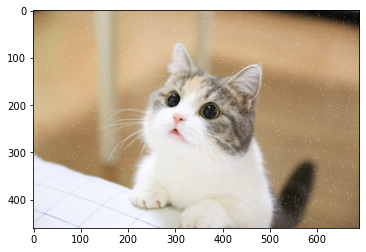

In [12]:
#### 平移

move_left_kernel = np.array([[0,0,0],[0,0,1],[0,0,0]])
move_right_kernel = np.array([[0,0,0],[1,0,0],[0,0,0]])

show_image(cv.filter2D(rgb_image, -1, move_left_kernel))
show_image(cv.filter2D(rgb_image, -1, move_right_kernel))


In [13]:
#### 提取边缘 
extract_kernel = np.array([[0,0,0],[1,0,-1],[0,0,0]])
image1 = cv.filter2D(org_rgb_image, -1, extract_kernel)

save_iamge(image1)



In [14]:
#### 锐化
average_kernel = np.ones((3, 3), dtype=np.float32)/9
image1 = cv.filter2D(org_rgb_image, -1, average_kernel)

image2 = org_rgb_image - image1 + org_rgb_image

save_iamge(image2)

In [15]:
#### 不同核大小和方差的高斯卷积核测试
image3 = cv.GaussianBlur(rgb_image, (7, 7), 0)

save_iamge(image3)

In [16]:
#### 中值滤波
image4 = cv.medianBlur(rgb_image, 3)

save_iamge(image4)


作业二：略

作业三: 实现图像金字塔（512x512 - 8x8）

In [21]:
src_image_path = './image/cat512x512.jpg'

# cv2.pyrDown 下采样
src_image = cv.imread(src_image_path)
image128x128 = cv.pyrDown(src_image)
save_iamge(image128x128, './image/cat128x128.jpg', False)
image64x64 = cv.pyrDown(image128x128)
save_iamge(image64x64, './image/cat64x64.jpg', False)

# cv2.pyrUp   上采样
image128x128_up = cv.pyrUp(image64x64)
save_iamge(image128x128_up, './image/cat128x128_up.jpg', False)
